In [1]:
import pandas as pd
from ord_data_load import ORD_PATH, is_reaction_of_type, df_na_vals
from chem_render import draw_reaction, indigo
from fuzzysearch import find_near_matches
from rdkit.Chem.rdChemReactions import ReactionFromSmarts

import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

In [2]:
%%time
suzuki_df = pd.read_pickle(f"{ORD_PATH}/suzuki.pkl.zst")

CPU times: total: 812 ms
Wall time: 818 ms


In [3]:
df_na_vals(suzuki_df)

reaction_smile        ->         Missing values: 0 (0.00%)
solvents              ->         Missing values: 18821 (32.83%)
reactants             ->         Missing values: 0 (0.00%)
catalysts             ->         Missing values: 23675 (41.30%)
reagents              ->         Missing values: 57322 (100.00%)
temperature           ->         Missing values: 21495 (37.50%)
time                  ->         Missing values: 43842 (76.48%)
product               ->         Missing values: 1737 (3.03%)
yield                 ->         Missing values: 23276 (40.61%)
notes                 ->         Missing values: 0 (0.00%)
patent                ->         Missing values: 0 (0.00%)
original_dataset      ->         Missing values: 0 (0.00%)


['reagents']

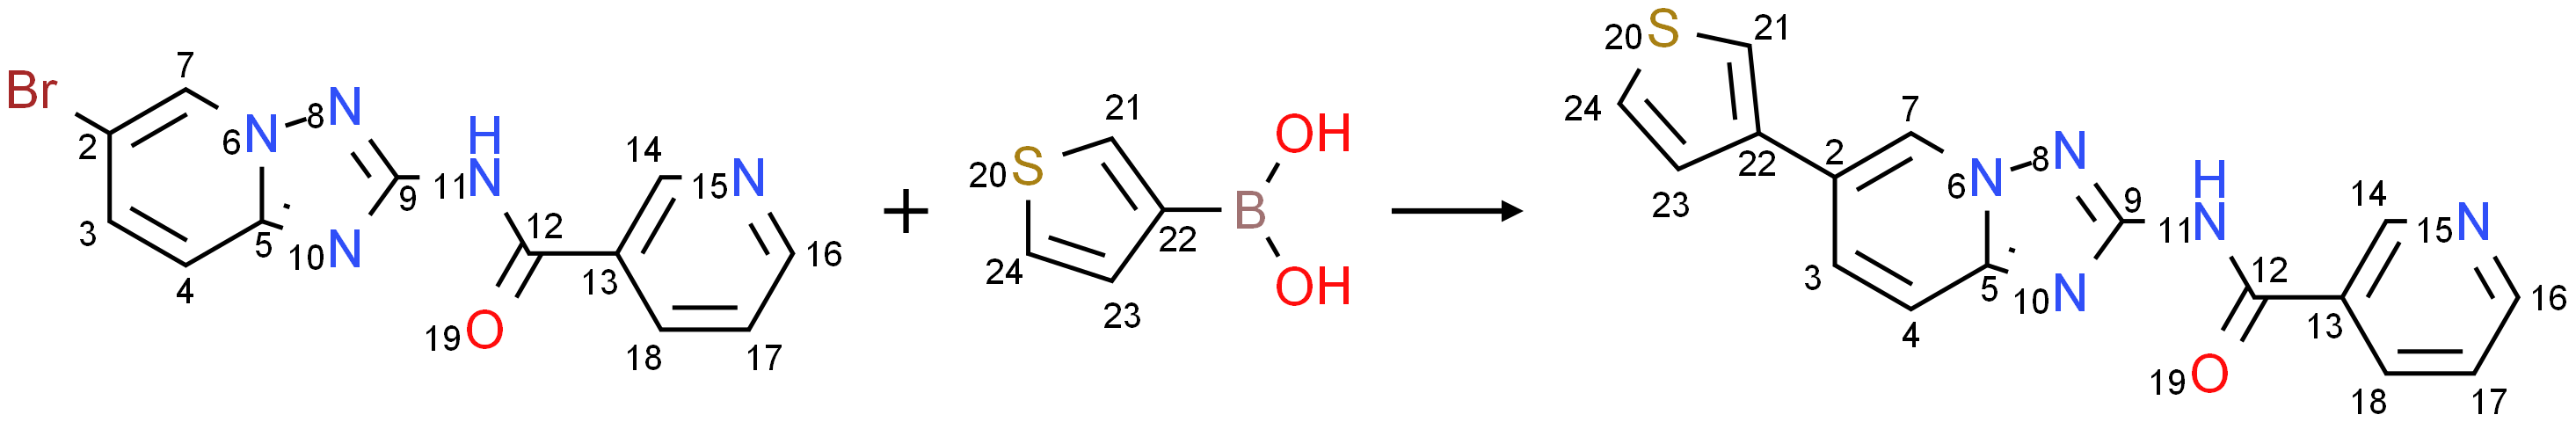

Patent:       US08263595B2
Reaction_id:  ord-c7e7131a5d5244dca00fccf319a880d9
The title compound was prepared following procedure described for intermediate A1 step a), but starting from N-(6-bromo[1,2,4]triazolo[1,5-a]pyridin-2-yl)nicotinamide ((B6), 75 mg; 0.24 mmol; 1.0 eq.) and 3-thienylboronic acid (60 mg; 0.47 mmol; 2.0 eq.). Purification by flash chromatography on silica (MeOH/EtOAc, 5:95) gave the title compound as a beige powder (18.1 mg, 23%). HPLC, Rt: 2.13 min. (purity 94.3%). LC/MS, M+(ESI): 322.3, M−(ESI): 320.2.


In [4]:
draw_reaction(suzuki_df[~suzuki_df['solvents'].apply(bool)])

In [5]:
full_text = "2 M aqueous Na2CO3 solution (0.84 mL) was added to a solution of (S)-6-(2-hydroxy-2-methylpropyl)-6-phenyl-3-[(S)-1-(4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)phenyl)ethyl]-1,3-oxazinan-2-one (0.40 g) and 5-bromo-1-cyclopropylmethyl-1H-pyridin-2-one (0.24 g) in dimethyl-formamide (4 mL). The resulting mixture was sparged with argon for 10 min, before [1,1′-bis(diphenylphosphino)ferrocene]-dichloropalladium(II) dichloromethane complex (34 mg) was added. The mixture was heated to 100° C. and stirred at this temperature for 4 h. After cooling to ambient temperature, water was added and the resulting mixture was extracted with ethyl acetate. The combined organic extracts were washed with brine, dried (MgSO4), and concentrated. The residue was purified by chromatography on silica gel (dichloromethane/methanol 99:1->95:5) to afford the title compound that was crystallized with little ethyl acetate. Yield: 0.19 g (46% of theory); Mass spectrum (ESI+): m/z=501 [M+H]+."

search_text = "9-Bromo-4,5-dihydro-6-oxa-3-thia-1-aza-benzo[e]azulene-2-carboxylic acid (2-hydroxy-ethyl)-isopropyl-amide"

In [6]:
matches = find_near_matches(search_text, full_text, max_l_dist=3)
if matches:
    for m in matches:
        print(m)


In [29]:
%%time
def match(sequence, subsequence):
    matches = find_near_matches(subsequence, sequence, max_l_dist=3)
    if matches:
        return True
    return False

mask = suzuki_df['notes'].apply(match, args=(full_text,))
mask.sum()

CPU times: total: 1.64 s
Wall time: 1.64 s


7

In [30]:
%%time
mask_exact = suzuki_df['notes'].str.contains(full_text, regex=False)
mask_exact.sum()

CPU times: total: 31.2 ms
Wall time: 35 ms


6

In [31]:
suzuki_df.loc[mask & ~mask_exact, 'notes'].iat[0]

'2 M aqueous Na2CO3 solution (0.84 mL) was added to a solution of (S)-6-(2-hydroxy-2-methylpropyl)-6-phenyl-3-[(S)-1-(4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)phenyl)ethyl]-1,3-oxazinan-2-one (0.40 g) and 5-bromo-1-cyclopropylmethyl-1H-pyridin -2-one (0.24 g) in dimethyl-formamide (4 mL). The resulting mixture was sparged with argon for 10 min, before [1,1′-bis(diphenylphosphino)ferrocene]-dichloropalladium(II) dichloromethane complex (34 mg) was added. The mixture was heated to 100° C. and stirred at this temperature for 4 h. After cooling to ambient temperature, water was added and the resulting mixture was extracted with ethyl acetate. The combined organic extracts were washed with brine, dried (MgSO4), and concentrated. The residue was purified by chromatography on silica gel (dichloromethane/methanol 99:1->95:5) to afford the title compound that was crystallized with little ethyl acetate. Yield: 0.19 g (46% of theory); Mass spectrum (ESI+): m/z=501 [M+H]+.'

In [32]:
suzuki_df.loc[mask_exact, 'notes'].iat[0]

'2 M aqueous Na2CO3 solution (0.84 mL) was added to a solution of (S)-6-(2-hydroxy-2-methylpropyl)-6-phenyl-3-[(S)-1-(4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)phenyl)ethyl]-1,3-oxazinan-2-one (0.40 g) and 5-bromo-1-cyclopropylmethyl-1H-pyridin-2-one (0.24 g) in dimethyl-formamide (4 mL). The resulting mixture was sparged with argon for 10 min, before [1,1′-bis(diphenylphosphino)ferrocene]-dichloropalladium(II) dichloromethane complex (34 mg) was added. The mixture was heated to 100° C. and stirred at this temperature for 4 h. After cooling to ambient temperature, water was added and the resulting mixture was extracted with ethyl acetate. The combined organic extracts were washed with brine, dried (MgSO4), and concentrated. The residue was purified by chromatography on silica gel (dichloromethane/methanol 99:1->95:5) to afford the title compound that was crystallized with little ethyl acetate. Yield: 0.19 g (46% of theory); Mass spectrum (ESI+): m/z=501 [M+H]+.'

In [51]:
from difflib import ndiff

seq_fuzz = suzuki_df.loc[mask & ~mask_exact, 'notes'].iat[0]
seq_exact = suzuki_df.loc[mask_exact, 'notes'].iat[0]

for s in ndiff(seq_exact, seq_fuzz):
    if s[0] == " ": continue
    print(f"{s[0]}: {s[1:]}")



+:   


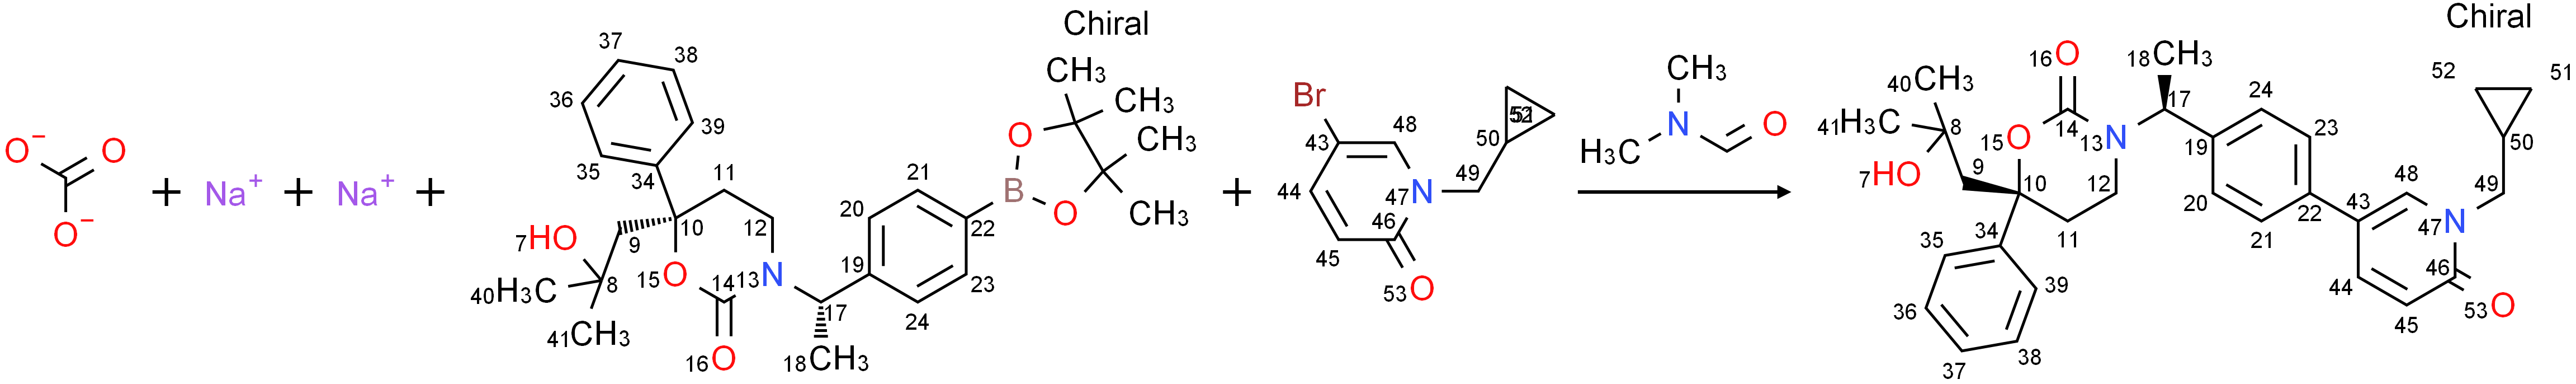

Patent:       US08575157B2
Reaction_id:  ord-40a652a4c67a4f2c953011c1523d8fc8
2 M aqueous Na2CO3 solution (0.84 mL) was added to a solution of (S)-6-(2-hydroxy-2-methylpropyl)-6-phenyl-3-[(S)-1-(4-(4,4,5,5-tetramethyl-1,3,2-dioxaborolan-2-yl)phenyl)ethyl]-1,3-oxazinan-2-one (0.40 g) and 5-bromo-1-cyclopropylmethyl-1H-pyridin-2-one (0.24 g) in dimethyl-formamide (4 mL). The resulting mixture was sparged with argon for 10 min, before [1,1′-bis(diphenylphosphino)ferrocene]-dichloropalladium(II) dichloromethane complex (34 mg) was added. The mixture was heated to 100° C. and stirred at this temperature for 4 h. After cooling to ambient temperature, water was added and the resulting mixture was extracted with ethyl acetate. The combined organic extracts were washed with brine, dried (MgSO4), and concentrated. The residue was purified by chromatography on silica gel (dichloromethane/methanol 99:1->95:5) to afford the title compound that was crystallized with little ethyl acetate. Yield: 0.19

In [8]:
draw_reaction(suzuki_df[mask])

In [9]:
suzuki_df.loc[mask, 'patent'].unique()

array(['US08754076B2', 'US08629138B2', 'US08138178B2', 'US08673899B2',
       'US08680093B2', 'US08114868B2', 'US08575157B2'], dtype=object)

In [10]:
suzuki_dd = dd.from_pandas(suzuki_df['notes'], npartitions=240)
mask_dd = suzuki_dd.apply(match,
               args=(search_text,),
               meta=pd.Series(dtype=bool)).compute(scheduler="threads")
mask_dd.sum()

[########################################] | 100% Completed | 1.63 sms


60

In [11]:
all_reactions = pd.read_pickle(f"{ORD_PATH}/all_reactions.pkl")
uspto_df = all_reactions.loc[~all_reactions['patent'].isna()]

In [12]:
uspto_dd = dd.from_pandas(uspto_df['notes'], npartitions=240)
mask_dd = uspto_dd.apply(match,
               args=(full_text,),
               meta=pd.Series(dtype=bool)).compute(scheduler="processes")
mask_dd.sum()
# mask = uspto_df['notes'].apply(match, args=(search_text,))

[########################################] | 100% Completed | 13.53 s


7

In [13]:
uspto_df.loc[mask_dd]

,reaction_smile,solvents,reactants,catalysts,reagents,temperature,time,product,yield,notes,patent,original_dataset
id,,,,,,,,,,,,
ord-be66159866904e76938662ac07366c83,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08754076B2,ord_dataset-275a3da8f45f4536ad29727f0ef9ba66
ord-076bd0fdac2149e780d465a95cb6dc70,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08629138B2,ord_dataset-31641fb65b34430fa7435229b949b604
ord-d8b9a8eb0ea44862ac9741115adeb8ae,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08138178B2,ord_dataset-68715347640045adb1b09e6a04722b0e
ord-aeb55b33497c4fabb9efc36219ea8c85,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08673899B2,ord_dataset-7456bda2326f4bebaa874a5474d4cc0d
ord-a1e436dfba464660a070b1c801f1313f,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08680093B2,ord_dataset-7456bda2326f4bebaa874a5474d4cc0d
ord-29a82ff48a474889b2ff08fa13afa2ee,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08114868B2,ord_dataset-aaeaab5f3720492494c1cbbdd0ed2820
ord-40a652a4c67a4f2c953011c1523d8fc8,C([O-])([O-])=O.[Na+].[Na+].[OH:7][C:8]([CH3:4...,"[[dimethyl-formamide, CN(C=O)C]]","[[Na2CO3, C(=O)([O-])[O-].[Na+].[Na+]], [(S)-6...",[],[],100.0,4.0,C1(CC1)CN1C=C(C=CC1=O)C1=CC=C(C=C1)[C@H](C)N1C...,NaN,2 M aqueous Na2CO3 solution (0.84 mL) was adde...,US08575157B2,ord_dataset-d932d1d683704a8bad3d064bcb197acc


In [14]:
uspto_dd = dd.from_pandas(suzuki_df['notes'], npartitions=240)
mask_dd = uspto_dd.apply(match,
                         args=(full_text,),
                         meta=pd.Series(dtype=bool)).compute(scheduler="threads")
mask_dd.sum()

[########################################] | 100% Completed | 1.97 sms


7